 import Data

In [ ]:
import pandas as pd
df = pd.read_excel("/content/ENB2012_data.xlsx")



Exploratory Data Analysis (EDA)



In [ ]:
print(df.isnull().sum())   # Should return 0 for all columns ideally


X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64


structure of the dataset

In [ ]:
print(df.head())         # View first few rows
print(df.info())         # Data types and non-null count
print(df.describe())     # Summary stats (mean, std, min, max)


     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB
None
               X1      

Visualize correlations

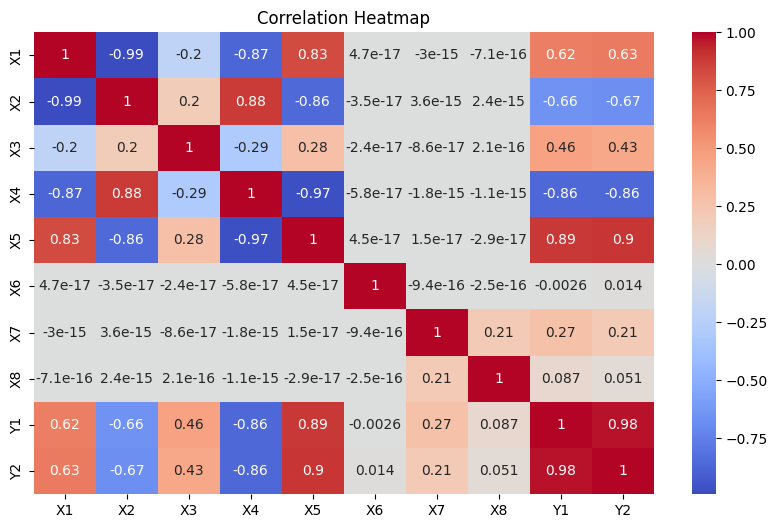

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


***Import Libraries***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
X = df[['X1','X2','X3','X4','X5','X6','X7','X8']]
# Features and Targets
X = df.drop(['Y1', 'Y2'], axis=1)
y1 = df['Y1']  # Heating Load
y2 = df['Y2']  # Cooling Load



Train-Test Split

In [ ]:
# Split into training and testing sets
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y1, y2, test_size=0.2, random_state=42)


***Apply Random Forest Regression***

In [ ]:
# Initialize Random Forest models
rf_model_y1 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_y2 = RandomForestRegressor(n_estimators=100, random_state=42)



 code initializes two Random Forest Regressor models with 100 trees each. The random_state=42 ensures that the models produce the same results each time they are trained, making the process reproducible.Other hyperparameters: If not specified, they will take their default values. For example, max_depth=None, min_samples_split=2, and max_features='auto'.




 Predict and Evaluate

In [ ]:
# Train the models
rf_model_y1.fit(X_train, y1_train)
rf_model_y2.fit(X_train, y2_train)# Predict
y1_pred = rf_model_y1.predict(X_test)
y2_pred = rf_model_y2.predict(X_test)

In [ ]:
# Evaluate Heating Load
mse_y1 = mean_squared_error(y1_test, y1_pred)
rmse_y1 = np.sqrt(mse_y1)
r2_y1 = r2_score(y1_test, y1_pred)

# Evaluate Cooling Load
mse_y2 = mean_squared_error(y2_test, y2_pred)
rmse_y2 = np.sqrt(mse_y2)
r2_y2 = r2_score(y2_test, y2_pred)

# Display Results
print("🔹 Heating Load (Y1) Performance:")
print(f"MSE: {mse_y1}")
print(f"RMSE: {rmse_y1}")
print(f"R² Score: {r2_y1}")

print("\n🔹 Cooling Load (Y2) Performance:")
print(f"MSE: {mse_y2}")
print(f"RMSE: {rmse_y2}")
print(f"R² Score: {r2_y2}")

🔹 Heating Load (Y1) Performance:
MSE: 0.24088314337662134
RMSE: 0.49079847532018817
R² Score: 0.9976889803753333

🔹 Cooling Load (Y2) Performance:
MSE: 2.9340964745454556
RMSE: 1.7129204519023806
R² Score: 0.9683338660414131


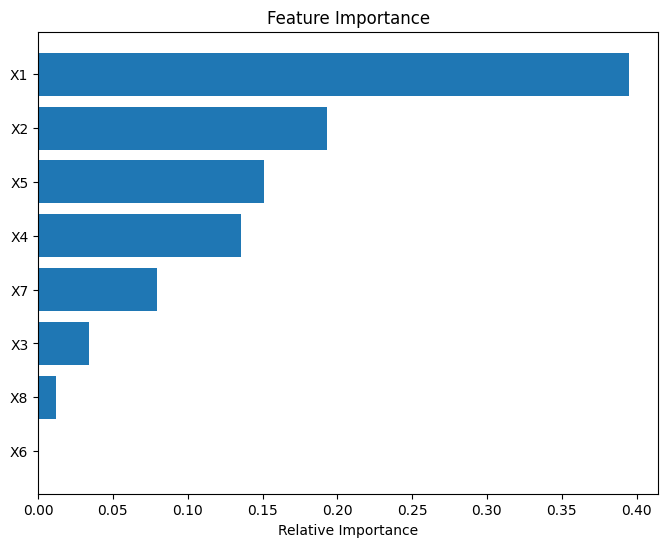

In [ ]:
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


 ***Gradient Boosting***

In [ ]:
# Importing required libraries
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Model for Y1 (Heating Load)
gbr_y1 = GradientBoostingRegressor(random_state=42)
gbr_y1.fit(X_train, y1_train)
y1_pred = gbr_y1.predict(X_test)

# Evaluate performance for Y1
mse_y1 = mean_squared_error(y1_test, y1_pred)
rmse_y1 = np.sqrt(mse_y1)
r2_y1 = r2_score(y1_test, y1_pred)

print("Heating Load (Y1) Performance using GBR:")
print(f"MSE: {mse_y1}")
print(f"RMSE: {rmse_y1}")
print(f"R² Score: {r2_y1}")

# Model for Y2 (Cooling Load)
gbr_y2 = GradientBoostingRegressor(random_state=42)
gbr_y2.fit(X_train, y2_train)
y2_pred = gbr_y2.predict(X_test)

# Evaluate performance for Y2
mse_y2 = mean_squared_error(y2_test, y2_pred)
rmse_y2 = np.sqrt(mse_y2)
r2_y2 = r2_score(y2_test, y2_pred)

print("\nCooling Load (Y2) Performance using GBR:")
print(f"MSE: {mse_y2}")
print(f"RMSE: {rmse_y2}")
print(f"R² Score: {r2_y2}")


Heating Load (Y1) Performance using GBR:
MSE: 0.26531070238402077
RMSE: 0.5150831994775414
R² Score: 0.9974546237181696

Cooling Load (Y2) Performance using GBR:
MSE: 2.2898288384668795
RMSE: 1.5132180406229896
R² Score: 0.9752871020533295


***Heating Load (Y1) Performance***

MSE (Mean Squared Error): 0.265

Measures the average of the squares of the errors.

Lower values indicate better performance; this is very low, meaning the predictions are close to actual values.

RMSE (Root Mean Squared Error): 0.515

Square root of MSE; gives an idea of the average prediction error in the same units as the target.

A value of 0.515 is quite low and suggests highly accurate predictions.

R² Score (R-squared): 0.9975

Indicates how well the model explains the variability of the target variable.

An R² of 0.9975 is excellent—GBR is explaining over 99.75% of the variance in heating load.


***Cooling Load (Y2) Performance***:

MSE: 2.289

Slightly higher than Y1, but still relatively low.

RMSE: 1.513

A bit larger error in absolute terms compared to Y1.

R² Score: 0.9753

Still a strong performance, explaining 97.53% of the variance in cooling load.

